# Problem 1
## 1.1

First we have to load the data into Python and divide X (features) and Y (target).

In [3]:
import numpy as np
import matplotlib.pyplot as plt

path = "E:/Graduate Study Material/ML/Assignments/final/data/iris.txt"
iris = np.genfromtxt(path , delimiter = None)   # load the text file
Y = iris[:,-1]                     # target value is the last column
X = iris[:,0:-1]                   # features are the other columns

In [4]:
print(X.shape)

(148, 4)


Through X.shape function, we get (148 , 4). So the number of features is 4, the number of data points is 148.

## 1.2

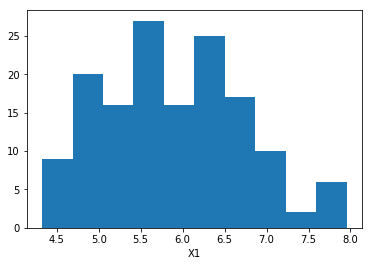

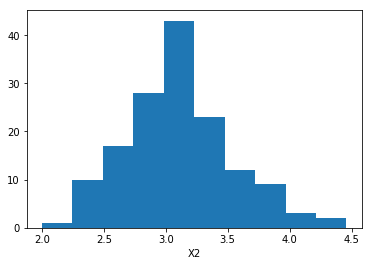

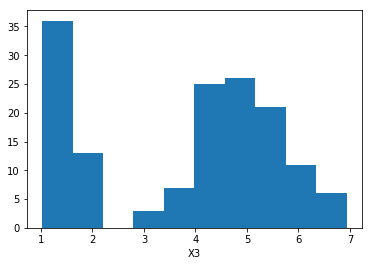

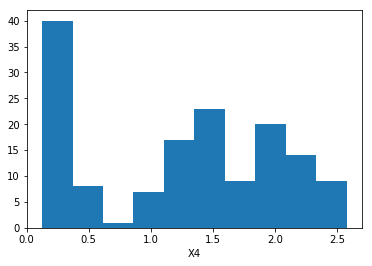

In [5]:
for c in range(4):  # plot a histogram of 4 features
    plt.hist(X[:,c])
    plt.xlabel('X%d'%(c+1)) 
    plt.show()

From above, we can see four histogram of X1, X2, X3, X4.

## 1.3

In [6]:
mean = np.mean(X,axis=0)
std = np.std(X,axis=0)
print(np.round(mean,4))
print(np.round(std,4))

[5.9001 3.0989 3.8196 1.2526]
[0.8334 0.4363 1.7541 0.7588]


So, the mean & standard deviation of the data points for X1 is 5.9001 and 0.8334. For X2, it's 3.0989 and 0.4363. For X3, it's 3.8196 and 1.7541. For X4, it's 1.2526 and 0.7588.

## 1.4

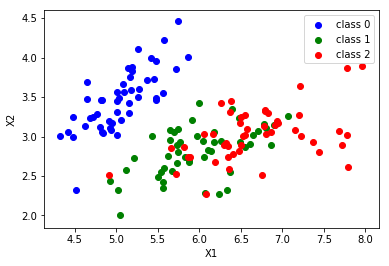

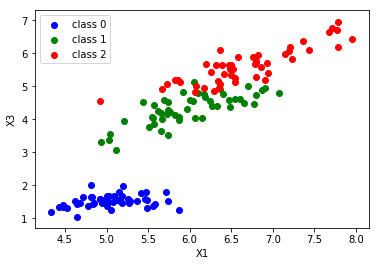

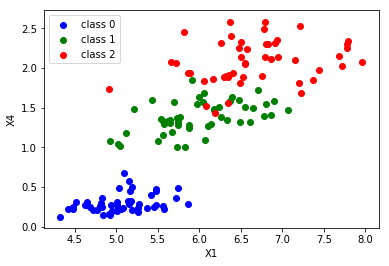

In [7]:
colors = ['b','g','r']
for n in range(1,4):    # outter loop: plot scatterplot for 3 pairs
    for i,c in enumerate(np.unique(Y)):    
        # inner loop: for one pair, plot for 3 classes
        plt.scatter(X[Y==c,0],X[Y==c,n],c=colors[i],label='class %d'%i)
        plt.legend()
        plt.xlabel('X1')
        plt.ylabel('X%d' % (n+1)) 
    plt.show()

The scatterplots can be seen above.

# Problem 2
## 2.1

First we have to load mltools, and use only the first two columns of data for XX and the last column for Y.

In [8]:
import sys
sys.path.append('E:/Graduate Study Material/ML/Assignments/final')
import mltools as ml

np.random.seed(0)    # set seed to ensure consistent behavior each time
X , Y = ml.shuffleData( X , Y )    # shuffle data randomly
XX = X[: , 0:2]    # XX is the first two features
XXtr , XXva , Ytr , Yva = ml.splitData( XX , Y , 0.75 )    
# split data into 75/25 train/validation

For 4 different K, we can plot the classification boundary using plotClassify2D .

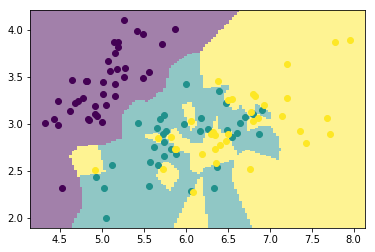

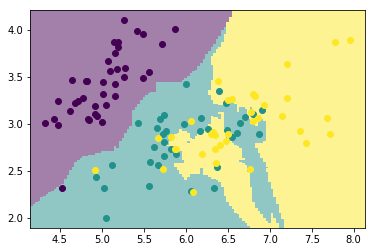

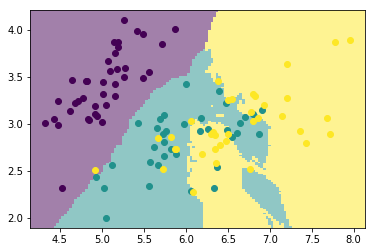

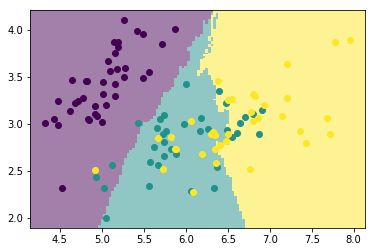

In [9]:
K = [1 , 5 , 10 , 50]
for k in K:    # for each K, plot the classification boundary
    knn = ml.knn.knnClassify()    # create the object and train it
    knn.train( XXtr , Ytr , k )
    YvaHat = knn.predict(XXva)    # get estimates of y for each data point in XXva
    ml.plotClassify2D( knn , XXtr , Ytr )    
    # make 2D classification plot with data (XXtr,Ytr)
    plt.show()    # clean the canvas

From the pictures above, we can find that when K gets bigger, the decision boundary becomes more simple and smooth. 

## 2.2

In [10]:
K = [1,2,5,10,50,100,200]
errTrain = [0] * len(K)    
errEvaluation = errTrain.copy()
# create two list to store error rate of training data and evaluation data

In [11]:
for i,k in enumerate(K):    # for each K, compute the error rate
    learner = ml.knn.knnClassify( XXtr , Ytr , k )    
    # use ( XXtr , Ytr , k ) to train model
    errTrain[i] = learner.err( XXtr , Ytr )    
    # compute the error rate of training data and store it in list errTrain    
    errEvaluation[i] = learner.err( XXva , Yva )    
    # compute the error rate of training data and store it in list errEvaluation

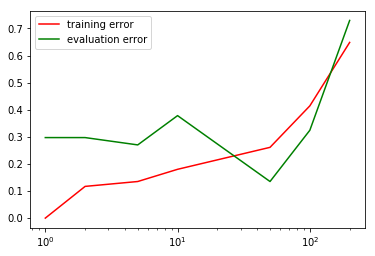

In [12]:
line1, = plt.semilogx( K , errTrain , color = 'r' )    # Plot training error rate
line2, = plt.semilogx( K , errEvaluation, color = 'g' )  # Plot evaluation error rate
plt.legend((line1,line2),('training error','evaluation error'))
plt.show()

From the above plots, we can see that when K gets larger, training error becomes bigger, while evaluation error has an uncertain change. In this case, the evaluation error is smallest when K = 50. As a result, I would like to recommend K = 50.

## 2.3
To use all the 4 feartures, we can use the same code as 2.2 but replace XX(contains first two feartures) with X(contains 4 feartures).

In [13]:
Xtr,Xva,Ytr,Yva = ml.splitData( X , Y , 0.75 ) 
for i,k in enumerate(K):
    learner = ml.knn.knnClassify( Xtr , Ytr , k )
    errTrain[i] = learner.err( Xtr , Ytr )
    errEvaluation[i] = learner.err( Xva , Yva )

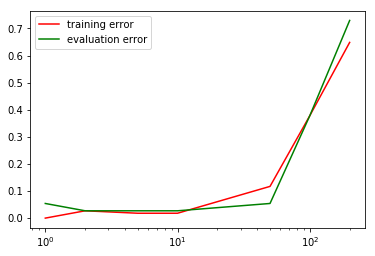

In [14]:
line1, = plt.semilogx(K,errTrain,color='r')
line2, = plt.semilogx(K,errEvaluation,color='g')
plt.legend((line1,line2),('training error','evaluation error'))
plt.show()

From the above plots, we find it's different from picture in 2.2. In this case, the evaluation error is smallest when K = 2,5,and 10. As a result, the recommendation will change to K = 2,5,and 10.

# Problem 3
## 3.1

From the data, we can caculate all the probabilities necessary as below.
$$P(y = 1) = 2/5$$
$$P(x_1 = 0 | y = 1)= 1/4$$
$$P(x_1 = 0 | y = -1) = 1/2$$
$$P(x2 = 0 | y = 1) = 1$$
$$P(x2 = 0 | y = -1) = 1/6$$
$$P(x3 = 0 | y = 1) = 1/4$$
$$P(x3 = 0 | y = -1) = 1/3$$
$$P(x4 = 0 | y = 1) = 1/2$$
$$P(x4 = 0 | y = -1) = 1/6$$
$$P(x5 = 0 | y = 1) = 3/4$$
$$P(x5 = 0 | y = -1) = 2/3$$

## 3.2

For $X=(0,0,0,0,0)$
Because $P(xy) = P(y)P(x|y)$,
$$P(X=(0,0,0,0,0),y=1)$$
$$=P(y=1)P(X=(0,0,0,0,0)|y=1)$$
$$=P(y=1)P(x1=0,x2=0,x3=0,x4=0,x5=0)|y=1)$$
$$=2/5*(1/4*1*1/4*1/2*3/4)=3/320$$

$$P(X=(0,0,0,0,0),y=-1)$$
$$=P(y=-1)P(X=(0,0,0,0,0)|y=-1)$$
$$=P(y=-1)P(x1=0,x2=0,x3=0,x4=0,x5=0)|y=-1)$$
$$=3/5*(1/2*1/6*1/3*1/6*2/3)=1/540$$
Since $P(X=(0,0,0,0,0),y=1)>P(X=(0,0,0,0,0),y=-1)$,we can predict y=1(read)

For $X=(1,1,0,1,0)$
$$P(X=(1,1,0,1,0),y=1)$$
$$=P(y=1)P(x1=1,x2=1,x3=0,x4=1,x5=0)|y=1)$$
$$=2/5*(3/4*0*1/4*1/2*3/4)=0$$

$$P(X=(1,1,0,1,0),y=-1)$$
$$=P(y=-1)P(x1=1,x2=1,x3=0,x4=1,x5=0)|y=-1)$$
$$=3/5*(1/2*5/6*1/3*5/6*2/3)=5/108$$
Since $P(X=(1,1,0,1,0),y=-1)>P(X=(1,1,0,1,0),y=1)$,we can predict that y=-1(discard)

## 3.3

$$P(y=1|X = (1,1,0,1,0)) = \frac{P(X=(1,1,0,1,0),y=1)}{P(X=(1,1,0,1,0),y=1)+P(X=(1,1,0,1,0),y=−1)}$$
$$=\frac{0}{0+5/108} = 0$$

## 3.4

* First, a “joint” Bayes classifier need complex computation. To compute the joint probability of the features x, we have to compute $2^5$ = 32 parameters. But if we use naïve Bayes classifier, we just need to compute 11 parameters.
* Second, in a “joint” Bayes classifier, there will be some joint probability of the features x equals to 0, but we can not simply say that certain combinations are impossible. For example, for these data, there are only 10 samples, so there are 32-10=22 joint probabilities equal to 0. Such situation become worse if we have less sample and more features. Naïve Bayes classifier can mostly avoid the problem.

## 3.5

Becouse naïve Bayes model assumes that features are independent of one another. If there are only features x2 . .. x5, the parameters of naïve Bayes model will be the same except we can not compute P(x1 $|$ y = 1) and P(x1 $|$ y = -1). So we don't need to re-train the model.

# Statement of Collaboration